# Data Loading & Read Clean File

In [178]:
# This Python 3 environment comes with many helpful analytics libraries installed

# Import general library
import numpy as np # linear algebra
from numpy import sqrt
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
from datetime import date, timedelta
from matplotlib import pyplot
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot
from math import sqrt

# Import sklearn model
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

# Import regression models
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# Import Xgboost
from xgboost import XGBRegressor
from xgboost import plot_importance

# Import fb prophet
from fbprophet import Prophet

# Import statsmodels
from statsmodels.tsa.holtwinters import ExponentialSmoothing as HWES
from statsmodels.tsa.api import ExponentialSmoothing
from statsmodels.tsa.api import Holt 
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

# Import others
import warnings
import gc


warnings.filterwarnings('ignore')



In [210]:
# Import Data

sample_submission = pd.read_csv('../data_local/sample_submission.csv')
test_input = pd.read_csv('../data_local/test.csv')
normData = pd.read_csv('predictFutureSalesClean.csv')

In [ ]:
# get rid of Unname column
normData.drop(normData.filter(regex="Unname"),axis=1, inplace=True)
normData

## QC dataframe for 1 top sales item

In [20]:
norm_6675= normData.loc[(normData['item_id']==6675)]
norm_6675

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,item_name,item_category_id,Required,item_category_name,date_month,date_year,total_sales
266278,2013-11-29,10,28,6675,18380.243902,41.0,"Москва ТЦ ""МЕГА Теплый Стан"" II",Sony PlayStation 4 (500 Gb) Black (CUH-1008A/1...,12,True,Игровые консоли - PS4,11,2013,753589.999998
266279,2013-11-30,10,28,6675,18240.000000,4.0,"Москва ТЦ ""МЕГА Теплый Стан"" II",Sony PlayStation 4 (500 Gb) Black (CUH-1008A/1...,12,True,Игровые консоли - PS4,11,2013,72960.000000
267967,2013-11-29,10,30,6675,18087.560976,41.0,"Москва ТЦ ""Перловский""",Sony PlayStation 4 (500 Gb) Black (CUH-1008A/1...,12,True,Игровые консоли - PS4,11,2013,741590.000000
267968,2013-11-30,10,30,6675,18323.333333,3.0,"Москва ТЦ ""Перловский""",Sony PlayStation 4 (500 Gb) Black (CUH-1008A/1...,12,True,Игровые консоли - PS4,11,2013,54970.000000
268624,2013-11-29,10,29,6675,18162.413793,29.0,"Москва ТЦ ""Новый век"" (Новокосино)",Sony PlayStation 4 (500 Gb) Black (CUH-1008A/1...,12,True,Игровые консоли - PS4,11,2013,526710.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1351376,2015-09-06,32,39,6675,24392.000000,1.0,"РостовНаДону ТРК ""Мегацентр Горизонт""",Sony PlayStation 4 (500 Gb) Black (CUH-1008A/1...,12,True,Игровые консоли - PS4,9,2015,24392.000000
1352474,2015-09-05,32,38,6675,24392.000000,1.0,"Омск ТЦ ""Мега""",Sony PlayStation 4 (500 Gb) Black (CUH-1008A/1...,12,True,Игровые консоли - PS4,9,2015,24392.000000
1389455,2015-09-05,32,28,6675,24392.000000,1.0,"Москва ТЦ ""МЕГА Теплый Стан"" II",Sony PlayStation 4 (500 Gb) Black (CUH-1008A/1...,12,True,Игровые консоли - PS4,9,2015,24392.000000
1401616,2015-10-10,33,39,6675,25991.000000,1.0,"РостовНаДону ТРК ""Мегацентр Горизонт""",Sony PlayStation 4 (500 Gb) Black (CUH-1008A/1...,12,True,Игровые консоли - PS4,10,2015,25991.000000


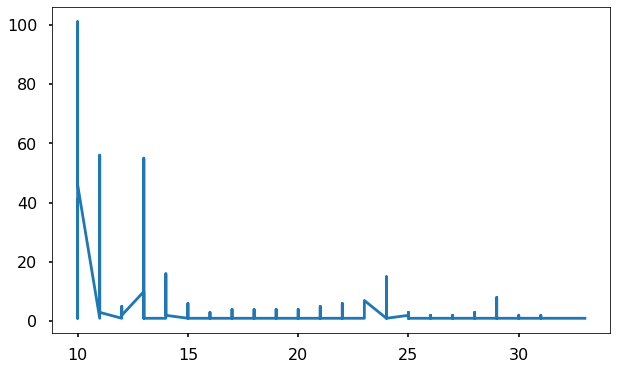

In [297]:
# Visualize the data
plt.figure(figsize=(10,6))

x= norm_6675['date_block_num']
y= norm_6675['item_cnt_day']

plt.plot(x,y)
plt.show()

# Data Decomposition (General)

In [6]:
# Only keep date & item_cnt_day
Forecast_IP = normData[['date','item_cnt_day']]
Forecast_IP['date'] = pd.to_datetime(Forecast_IP['date'])
# Set date as index
Forecast_IP = Forecast_IP.set_index('date')
## Select time period for weekly aggregation
Forecast_IP_weekly = Forecast_IP['2013-01-01':'2015-10-31'].resample('W').sum()
Forecast_IP_weekly

C:\Users\MLee27\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,item_cnt_day
date,
2013-01-06,7891.0
2013-01-13,6505.0
2013-01-20,5755.0
2013-01-27,6125.0
2013-02-03,5551.0
...,...
2015-10-04,17857.0
2015-10-11,12808.0
2015-10-18,14922.0


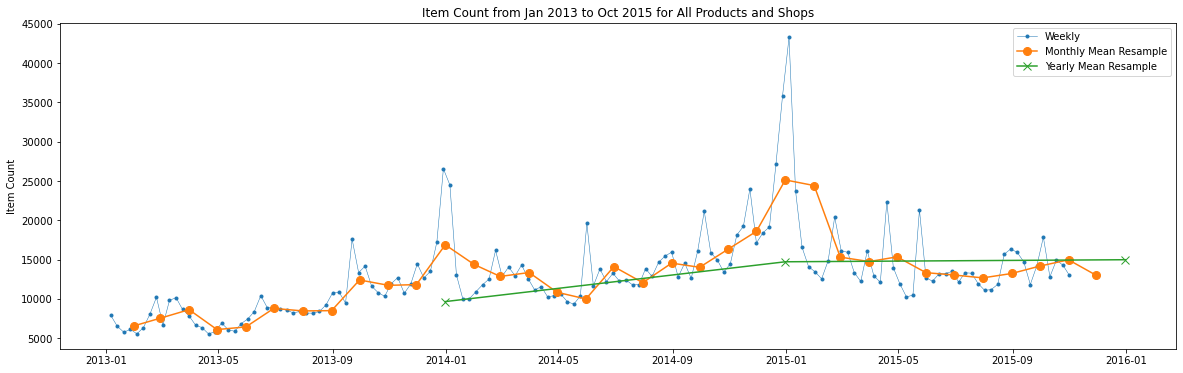

In [7]:
y = Forecast_IP_weekly['item_cnt_day']
fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(y,marker='.', linestyle='-', linewidth=0.5, label='Weekly')
ax.plot(y.resample('M').mean(),marker='o', markersize=8, linestyle='-', label='Monthly Mean Resample')
ax.plot(y.resample('Y').mean(),marker='x', markersize=8, linestyle='-', label='Yearly Mean Resample')
ax.set_ylabel('Item Count')
ax.set_title('Item Count from Jan 2013 to Oct 2015 for All Products and Shops')
ax.legend();

In [8]:
import statsmodels.api as sm

# graphs to show seasonal_decompose
def seasonal_decompose (y):
    decomposition = sm.tsa.seasonal_decompose(y, model='additive',extrapolate_trend='freq')
    fig = decomposition.plot()
    fig.set_size_inches(14,7)
    plt.show()

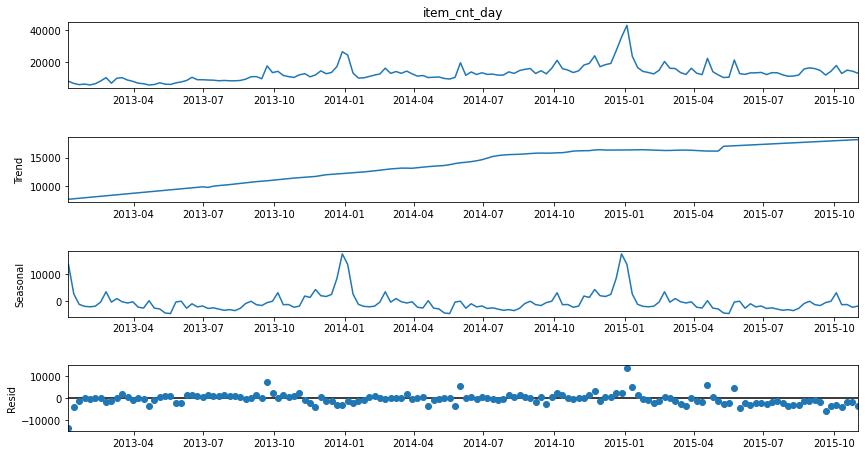

In [9]:
seasonal_decompose(y)

From observation from the four component, we can see the sales trend increasing from 2013 to 2015. 
The seasonal peak is 2014 & 2015 January. Seasonality and trend observed.

# Data Decomposition (Categorize by Item Category ID)

In [59]:
normData_filtered = normData[['date','item_cnt_day','item_category_id']]

In [61]:
#create unique list of names
UniqueNames = normData_filtered.item_category_id.unique()

#create a data frame dictionary to store your data frames
df = {elem : pd.DataFrame for elem in UniqueNames}

for key in df.keys():
    df[key] = normData_filtered[:][normData_filtered.item_category_id == key]

In [62]:
count=0
for elem in df:
    count+=1
print('Total Item Category is {}'.format(count))

Total Item Category is 60


In [63]:
# Only keep date & item_cnt_day
Forecast_IP_item20 = df[20][['date','item_cnt_day']]
Forecast_IP_item20['date'] = pd.to_datetime(Forecast_IP_item20['date'])
# Set date as index
Forecast_IP_item20 = Forecast_IP_item20.set_index('date')
## Select time period for weekly aggregation
Forecast_IP_item20_weekly = Forecast_IP_item20['2013-01-01':'2015-10-31'].resample('W').sum()
Forecast_IP_item20_weekly

,item_cnt_day
date,
2013-11-24,65.00000000
2013-12-01,1680.00000000
2013-12-08,725.00000000
2013-12-15,453.00000000
2013-12-22,792.00000000
...,...
2015-10-04,941.00000000
2015-10-11,1233.00000000
2015-10-18,1436.00000000


In [10]:
## Validate the start date of item category 20
df_validate = normData.loc[normData['item_category_id']==20]
df_validate= df_validate.sort_values(by='date')
df_validate

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,item_name,item_category_id,Required,item_category_name,date_month,date_year,total_sales
288906,2013-11-22,10,56,4271,2799.0,1.0,"Чехов ТРЦ ""Карнавал""","Knack [PS4, русская версия]",20,True,Игры - PS4,11,2013,2799.0
269326,2013-11-22,10,26,4231,2518.9,2.0,"Москва ТЦ ""Ареал"" (Беляево)","Killzone: В плену сумрака [PS4, русская версия]",20,True,Игры - PS4,11,2013,5037.8
274310,2013-11-22,10,31,4271,2799.0,1.0,"Москва ТЦ ""Семеновский""","Knack [PS4, русская версия]",20,True,Игры - PS4,11,2013,2799.0
269338,2013-11-22,10,26,4271,2799.0,2.0,"Москва ТЦ ""Ареал"" (Беляево)","Knack [PS4, русская версия]",20,True,Игры - PS4,11,2013,5598.0
289768,2013-11-22,10,54,4231,2799.0,2.0,"Химки ТЦ ""Мега""","Killzone: В плену сумрака [PS4, русская версия]",20,True,Игры - PS4,11,2013,5598.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1402785,2015-10-31,33,35,10202,1199.0,1.0,"Н.Новгород ТРЦ ""Фантастика""","Ведьмак 3: Дикая Охота - Дополнение ""Каменные ...",20,True,Игры - PS4,10,2015,1199.0
1404700,2015-10-31,33,57,7224,4499.0,1.0,"Якутск Орджоникидзе, 56",Uncharted: Натан Дрейк. Коллекция. Специальное...,20,True,Игры - PS4,10,2015,4499.0
1437795,2015-10-31,33,21,1586,5999.0,1.0,"Москва МТРЦ ""Афи Молл""","Assassin's Creed: Синдикат. Чаринг-Кросс [PS4,...",20,True,Игры - PS4,10,2015,5999.0
1420869,2015-10-31,33,18,7223,3999.0,2.0,"Красноярск ТЦ ""Июнь""","Uncharted: Натан Дрейк. Коллекция [PS4, русска...",20,True,Игры - PS4,10,2015,7998.0


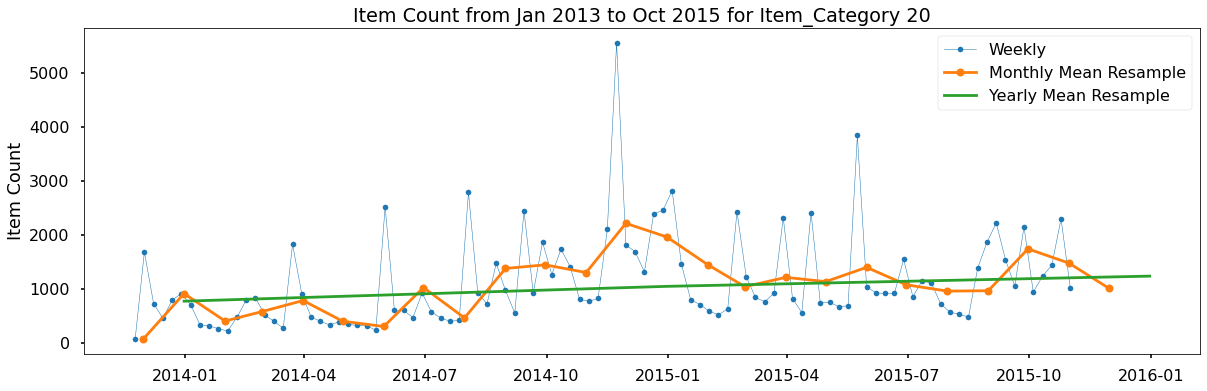

In [64]:
y = Forecast_IP_item20_weekly['item_cnt_day']
fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(y,marker='.', linestyle='-', linewidth=0.5, label='Weekly')
ax.plot(y.resample('M').mean(),marker='o', markersize=8, linestyle='-', label='Monthly Mean Resample')
ax.plot(y.resample('Y').mean(),marker='x', markersize=8, linestyle='-', label='Yearly Mean Resample')
ax.set_ylabel('Item Count')
ax.set_title('Item Count from Jan 2013 to Oct 2015 for Item_Category 20')
ax.legend();

In [40]:
import statsmodels.api as sm

# graphs to show seasonal_decompose
def seasonal_decompose (y):
    decomposition = sm.tsa.seasonal_decompose(y,model='additive', freq=30)
    fig = decomposition.plot()
    fig.set_size_inches(14,7)
    plt.show()

C:\Users\MLee27\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  """


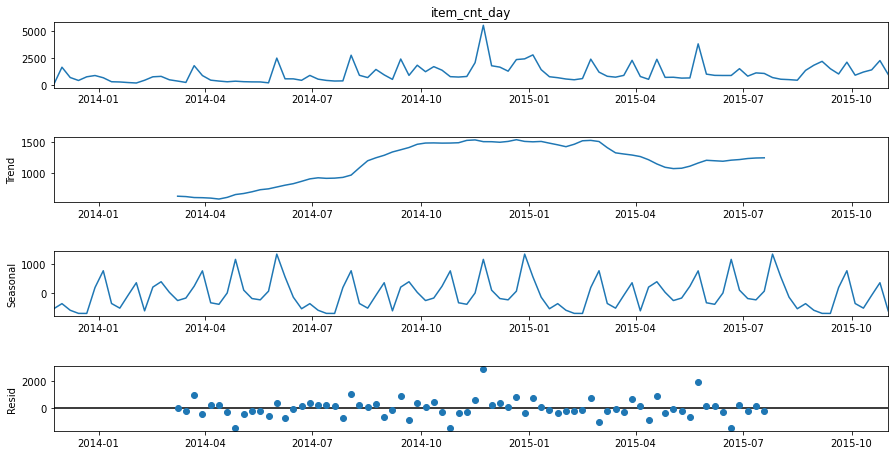

In [17]:
seasonal_decompose(y)

From observation, trend and  seasonality observed for item 20. 
Residual: also call noise, is the residual of original time series after seasonal and trend series are removed.

# Data Decomposition (Item ID)

In [21]:
norm_6675 = norm_6675[['date_block_num','item_cnt_day']]
norm_6675

,date_block_num,item_cnt_day
266278,10,41.0
266279,10,4.0
267967,10,41.0
267968,10,3.0
268624,10,29.0
...,...,...
1351376,32,1.0
1352474,32,1.0
1389455,32,1.0
1401616,33,1.0


In [22]:
norm_6675 = norm_6675.set_index('date_block_num')
norm_6675

,item_cnt_day
date_block_num,
10,41.0
10,4.0
10,41.0
10,3.0
10,29.0
...,...
32,1.0
32,1.0
32,1.0


In [23]:
import statsmodels.api as sm

# graphs to show seasonal_decompose
def seasonal_decompose (y):
    decomposition = sm.tsa.seasonal_decompose(y,model='additive', freq=30)
    fig = decomposition.plot()
    fig.set_size_inches(14,7)
    plt.show()

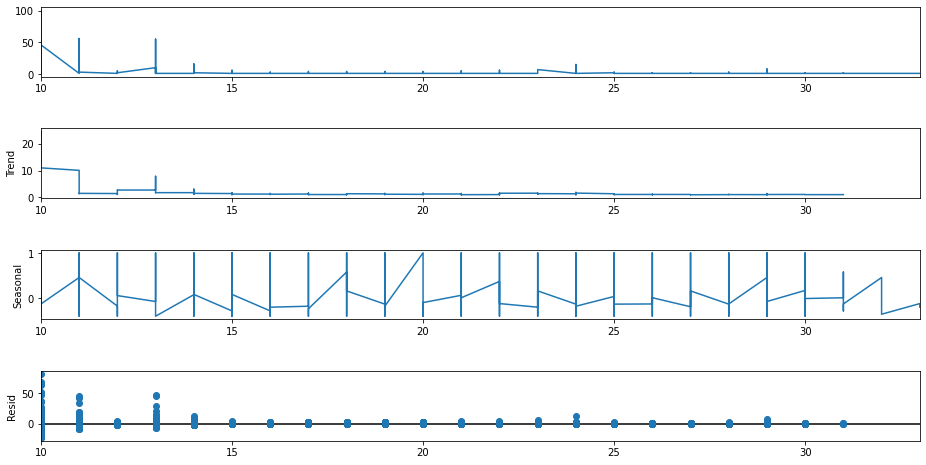

In [24]:
seasonal_decompose(norm_6675)

Monthly seasonality was observed in this example.

# Parameter Optimization for SARIMA & ARIMA

Before we start testing forecast modelling, we need to perform parameter optimization, to look for the optimum AR & MA term. We are using autogird search and ACF, ACF in this example.

## Autogrid search for SARIMA parameter

In [28]:
## Select popular item id for autogrid search
norm_6675

,item_cnt_day
date_block_num,
10,41.0
10,4.0
10,41.0
10,3.0
10,29.0
...,...
32,1.0
32,1.0
32,1.0


Parameters:

trend elements:
p: Trend autoregression order
d: Trend difference order
q: Trend moving average order

Seasonal Elements
P: Seasonal autoregressive order.
D: Seasonal difference order.
Q: Seasonal moving average order.
m: The number of time steps for a single seasonal period.

In order to get the best prediction, it’s important to find the values of SARIMA(p,d,q)(P,D,Q)m that optimize a metric of interest. In this example, we just use a "grid search" to iteratively explore different combinations of parameters.


Evaluation metric for this grid search is AIC (Akaike Information Criterion), that measure how well fit a model to overall model complexity. This help to choose the optimize parameterization for SARIMAX modelling with lowest AIC value.

AIC is an estimator to evaluate the relative quality of statistical models for given dataset. It provides means for model selection.

In [26]:
## Auto search function for SARIMAX function - check with one top sale item

import itertools

def sarima_grid_search(y,seasonal_period):
    p = d = q = range(0, 2)
    pdq = list(itertools.product(p, d, q))
    seasonal_pdq = [(x[0], x[1], x[2],seasonal_period) for x in list(itertools.product(p, d, q))]
    
    mini = float('+inf')
    
    
    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                mod = sm.tsa.statespace.SARIMAX(y,
                                                order=param,
                                                seasonal_order=param_seasonal,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False)

                results = mod.fit()
                
                if results.aic < mini:
                    mini = results.aic
                    param_mini = param
                    param_seasonal_mini = param_seasonal

                print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
            except:
                continue
    print('The set of parameters with the minimum AIC is: SARIMA{}x{} - AIC:{}'.format(param_mini, param_seasonal_mini, mini))

Our sample data has monthly seasonal pattern, and we aggregrated by day, so each data point is 1 day, so m=30

In [29]:
sarima_grid_search(norm_6675,30)

SARIMA(0, 0, 0)x(0, 0, 0, 30) - AIC:30727.813613711314
SARIMA(0, 0, 0)x(0, 0, 1, 30) - AIC:28595.135378668718
SARIMA(0, 0, 0)x(0, 1, 0, 30) - AIC:30977.656240988756
SARIMA(0, 0, 0)x(0, 1, 1, 30) - AIC:27584.362144881852
SARIMA(0, 0, 0)x(1, 0, 0, 30) - AIC:28360.474523496123
SARIMA(0, 0, 0)x(1, 0, 1, 30) - AIC:27943.707122039286
SARIMA(0, 0, 0)x(1, 1, 0, 30) - AIC:28233.350894399642
SARIMA(0, 0, 0)x(1, 1, 1, 30) - AIC:27356.464408555163
SARIMA(0, 0, 1)x(0, 0, 0, 30) - AIC:30335.741709573624
SARIMA(0, 0, 1)x(0, 0, 1, 30) - AIC:28343.64903417952
SARIMA(0, 0, 1)x(0, 1, 0, 30) - AIC:30952.72693485292
SARIMA(0, 0, 1)x(0, 1, 1, 30) - AIC:27418.912916581303
SARIMA(0, 0, 1)x(1, 0, 0, 30) - AIC:28293.461347066248
SARIMA(0, 0, 1)x(1, 0, 1, 30) - AIC:27891.755061267548
SARIMA(0, 0, 1)x(1, 1, 0, 30) - AIC:28187.751453218734
SARIMA(0, 0, 1)x(1, 1, 1, 30) - AIC:27256.629828521294
SARIMA(0, 1, 0)x(0, 0, 0, 30) - AIC:31870.9410867866
SARIMA(0, 1, 0)x(0, 0, 1, 30) - AIC:30169.415856698706
SARIMA(0, 1, 0

## ACF & PACF

Autocorrelation function (ACF) is the coefficient of correlation between two values in a time series. It is used to measure the association between an observation at time t and the observation at previous time spots [1]. The purposes are to detect non-randomness in data and find appropriate time series model if the data are not random [2]. Partial autocorrelation function (PACF) is an enhanced version of ACF by measure the association between an observation at time t and the observation at previous time spots by eliminating the existing linear influence [1]. 


In [34]:
# prep data for acf & pacf plot
#lag feature 

all_data = normData
all_data_by_day = all_data
aggregations = {'total_sales':'sum'}
all_data_by_day = all_data_by_day.groupby(['date'], as_index=False).agg(aggregations)
all_data_by_day['lag_1'] = all_data_by_day['total_sales'].shift(1)
all_data_by_day['lag_2'] = all_data_by_day['total_sales'].shift(2)
all_data_by_day['lag_3'] = all_data_by_day['total_sales'].shift(3)
all_data_by_day['lag_4'] = all_data_by_day['total_sales'].shift(4)
all_data_by_day['lag_5'] = all_data_by_day['total_sales'].shift(5)
all_data_by_day['lag_6'] = all_data_by_day['total_sales'].shift(6)
all_data_by_day['lag_7'] = all_data_by_day['total_sales'].shift(7)
all_data_by_day

,date,total_sales,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7
0,2013-01-01,286395.59,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-01-02,1258654.76,286395.59,NaN,NaN,NaN,NaN,NaN,NaN
2,2013-01-03,1131019.36,1258654.76,286395.59,NaN,NaN,NaN,NaN,NaN
3,2013-01-04,965669.29,1131019.36,1258654.76,286395.59,NaN,NaN,NaN,NaN
4,2013-01-05,955022.60,965669.29,1131019.36,1258654.76,286395.59,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1029,2015-10-27,2211635.13,1882246.16,3412849.00,4040446.00,6107958.00,2480586.00,2289480.0,2659223.8
1030,2015-10-28,1696390.10,2211635.13,1882246.16,3412849.00,4040446.00,6107958.00,2480586.0,2289480.0
1031,2015-10-29,1822707.40,1696390.10,2211635.13,1882246.16,3412849.00,4040446.00,6107958.0,2480586.0
1032,2015-10-30,2551906.12,1822707.40,1696390.10,2211635.13,1882246.16,3412849.00,4040446.0,6107958.0


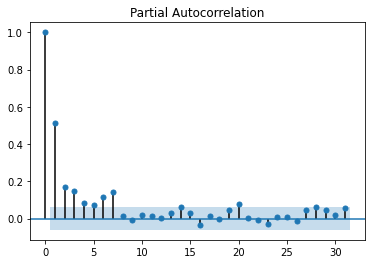

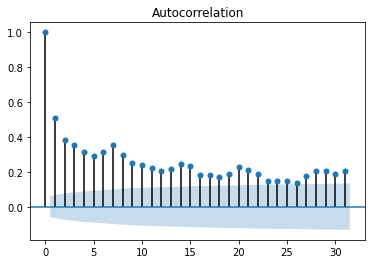

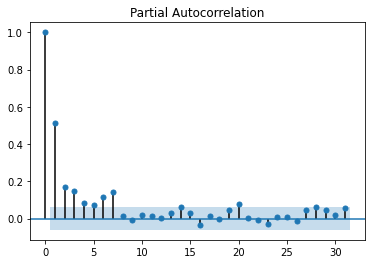

In [35]:
plot_acf(all_data_by_day['total_sales'])
plot_pacf(all_data_by_day['total_sales'])

The ACF & PACF plots helps to give intuition on Autoregressive(AR) and Moving Average (MA) term with a lag of k. The ACF & PACF plots above is showing the relationship of time series on total sales. From PACF plot, the correlation effect is strong at lag 1, and sharp decline afterwards.

This is tally with the autogrid search that we will apply both AR and MA term at lag 1.

# Modelling

In the modelling session, we are comparing different models to find the best prediction outcome for November sales.
As the input data is a time series data, we are working on both regression models, and forecast modelling.

1. Regression Models
   - Ridge Regression
   - Lasso Regression
   - Decision Tree Regressor
   - Random Forest Regression
   - XGBoost
   
   
2. Forecast Modelling
    - SARIMA
    - ARIMA
    - Holt-Winters' Seasonal Method
    - FbProphet
    

## Modelling Description

### Regression Models

#### Ridge Regression

Ridge regression creates a parsimonious model, by which the number of predictor variables exceeds the number of observations. Ridge regression adds bias to estimators to reduce the standard error, which gives the advantage of not requiring unbiased estimator.

We are using a GridsearchCV on Ridge Regression because of its capability to create different models and select one of the parameters given to give the best fit. The parameter ranges from 0.0001 to 100,000 using Cv (Cross-validation) of 7. GridsearchCV selected alpha 1.0 as the best parameter for our prediction.


#### Lasso Regression

The Lasso which means Least Absolute Shrinkage and Selection Operator. It performs L1 regularity, which adds some of the absolute value of coefficients in optimisation objective.

We are using GridsearchCV function and the same parameter from Ridge Regression but different Cv, 15. The function chose 1.0 as the best parameter for our prediction.


#### Decision Tree Regression

A Decision Tree Regression is used for a continuing output problem; that is, the result's output is not discrete. This observes an object's features and trains a model in a tree's structure to predict a future that produces meaningful continuous output. 

GridsearchCV function used, the list ranges from 3 to 30 as depth, and dictionary the parameter to maximum depth also Cv of 10, tree fit for prediction.


#### Random Forest Regression

A Decision Tree Regression is used for a continuing output problem; that is, the result's output is not discrete. This observes an object's features and trains a model in a tree's structure to predict a future that produces meaningful continuous output. 

GridsearchCV function used, the list ranges from 3 to 30 as depth, and dictionary the parameter to maximum depth also Cv of 10, tree fit for prediction.


#### XGBoost

For the section below, we would be explore the XGBoosting prediction method. XGBoosting stand for extreme gradient boosting and it have successfully won kaggle competitions (https://github.com/dmlc/xgboost/tree/master/demo#machine-learning-challenge-winning-solutions). The package includes efficient linear model solver linear model solver and tree learning algorithm. It supports regression functions therefore is suitable for our prediction scenario.

### Forecast Models

Here are the summary for each forecast model before the detail description:

ARIMA for data with trend but no seasonality

SARIMA for data with trend and/or seasonality

Holt-Winters’ Seasonal Method for data with trend and/or seasonality

FbProphet is for data with strong seasonal effect based on additive method

In this section, we are comparing different forecast models for best future sales prediction in November. Since our input data is grouped by item id, and from the results after seasonal decomposition, we observed there are both trends and seasonality in the data. 

Theoretically we expect to have better result for models that taking both trends and seasonality into account, for example SARIMA, Holt-Winter's Seasonal Method.

#### SARIMA & ARIMA

Auto-Regressive Integrated Moving Average (ARIMA) models look at autocorrelations or partial autocorrelations in the data.It looks into the values difference in the timeseries yo predict the future trends. 

The main parameter in this model are Autoregression (AR) and Moving Average (MA). 

AR refer to the changing variables at its own lagged, or prior values (Chen, 2019). Normally, we could get the intuition of this value from the ACF plot. 

MA refer to dependency between an observation and a residual error from moving average model applied to lagged observation (Chen, 2019). Normally, we could get the intuition from the PACF plot. 

SARIMA is a concept build based on ARIMA. It extends to model the seasonal elements in data. 


#### Holt-Winters' Seasonal Method

The Holt-Winters model extends from Holt Linear method to allow the forecasting of time series data that has both trend and seasonality. This method introduces seasonality smoothing parameter: γ

There are 2 types of seasonality
1. Additive - Seasonal changes in the data stay roughly the same over time and don't fluctuate in relation to the overall data
2. Multiplicative - Seasonal variation changes in relation to the overall changes in the data. Thus, if the data is trending upward, the seasonal differences grow proportionally as well. 

From the seasonal decompose function, we can see the seasonal variation changes are almost similar across 3 years. Thus, we can conclude that the seasonality of our data is additive and that is the reason only additive seasonality will be discussed in this example.

#### FbProphet

This model is used for forecast based on additive model where non-linear trends fit with yearly, weekly, and daily seasonality, as well as the holiday effects.

It works best with time series that have strong seasonal effects and several seasons of historical data. It is typically handles outlier well. 

## Functions Description

To create and assess all of our models, we use a series of helper functions that perform the following functions. The code for all of the helper functions can be found here.

Common functions:
1. Train test split -  Separating data to train test ratio 60% to 40%
2. Mean absolute percentage error - Formula to derive the MAPE 
3. Metrics score - Compute the RMSE, MAE, MAPE, r2score, and return them into dataframe for visualization

Function for regression modelling:
1. grid search cv - to seach the optimum parameter for Ridge, Lasso & Decision Tree Regressor

Function for forecast modelling:
1. Pred_line_plot - Visualize the input, predicted, and forecast time series
2. Pred_fb_plot -  Visualize the input, predicted, and forecast time seriesfor fbProphet model
3. Stationarity test - Compute p_value, and critical value to check time series stationarity
4. Differencing -  Apply differencing if the time series is not stationary
5. Forecast model- Algorithm for different models for training purpose

## Common Function

In [53]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true+1e-6)) * 100
    
    if type(mape) == pd.Series: mape = mape[0]
        
    return mape

def metrics_score(original, predict, model=None):
    rmse = sqrt(mean_squared_error(original, predict))
    mae = mean_absolute_error(original, predict)
    mape = mean_absolute_percentage_error(original, predict)
    r2score = r2_score(original, predict)
        
    metrics = dict (MAE="{:.4f}".format(mae), MAPE="{:.4f}".format(mape), R2_Score="{:.4f}".format(r2score), RMSE="{:.4f}".format(rmse))
    
    return metrics

## Regression Training Models

In [298]:
### General functions

def reg_train_test_split(X,y, ratio = None):

    if ratio == None:
        ratio = ratio
    # Splitting the data into Train and Test (70/30)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)  
    
    return X_train, X_test, y_train, y_test

def grid_search_cv(regression, params):
    if regression == "RIDGE":
        model = GridSearchCV(Ridge(), params, cv = 7, scoring = SCORING, n_jobs = JOB)
    elif regression == "LASSO":
        model = GridSearchCV(Lasso(), params ,cv = 15, scoring = SCORING, n_jobs = JOB)
    elif regression == "DECISIONTREE":
        model = GridSearchCV(DecisionTreeRegressor(), params, cv = 10)
    return model


def pred_reg_plot(orig_df, orig_y, pred_df, pred_y, title=None):
    
    fig, ax = plt.subplots(figsize=(15,5))

    plt.plot(pd.to_datetime(orig_df.index), orig_y, data=orig_df, color='skyblue', label='observed')
    plt.plot(pd.to_datetime(pred_df.index), pred_y, data=pred_df, color='olive', label='predicted')
      
    plt.title(title, fontsize=16, weight="bold")
    plt.ylabel("Item Count Data", fontsize=14)
    plt.xlabel("Date", fontsize=14)
    plt.legend(fontsize="12")
    plt.show()
    
    return plt

In [337]:
### Regression Models

SCORING = 'neg_mean_absolute_error'
JOB = -1

def model_prediction(X, y, regression=None):
    
    REGRESSION_MODEL = ""
    params = ""
    
    X_train, X_test, y_train, y_test = reg_train_test_split(X, y, ratio=0.7)
    
    if regression == "RANDOMFOREST":
        #perform GridSearchCV on Random Forest Regression
        tuned_params = {'n_estimators': [100, 200], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}  
        model = RandomizedSearchCV(RandomForestRegressor(), tuned_params, n_iter = 3, scoring = SCORING, cv = 3, n_jobs = -1)
        REGRESSION_MODEL = "Random Forest Regressor"
    else:
        if regression == "RIDGE":
            # Performing GridSearchCV on Ridge Regression
            params = {'alpha' : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]} 
            REGRESSION_MODEL = "Ridge Regressor"

        elif regression == "LASSO":
            # Performing GridSearchCV on Lasso Regression
            params = {'alpha' : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
            REGRESSION_MODEL = "Lasso Regressor"
          
        elif regression == "DECISIONTREE": 
            # Performing GridSearchCV on Decision Tree Regression
            depth = list(range(3,30))
            params = dict(max_depth = depth)
            print("Params", params)
            REGRESSION_MODEL = "Decision Tree"
        
        model = grid_search_cv(regression, params)
    
    model.fit(X_train, y_train)
    
    #predict train and test result
    y_test_pred = model.predict(X_test)
    
    
    #check prediction for test
    metrics = metrics_score(y_test, y_test_pred, model=None)
    
    print("Initialize {} for item {} " .format( REGRESSION_MODEL, item_id))
    
    return metrics, y_test, y_test_pred, X_train, model
    

In [338]:
## Select top popular item for sample analysis

sample_id = [32, 33, 500,600, 857, 2808, 3732, 6675, 12796, 16787, 3331, 17717, 4577, 22102, 20949]

sample_regmodel_data = normData.loc[normData['item_id'].isin(sample_id)]
sample_regmodel_data

,Unnamed: 0,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,item_name,item_category_id,Required,item_category_name,date_month,date_year,total_sales
15,15,2013-01-02,0,25,2808,999.0,2.0,"Москва ТРК ""Атриум""","Diablo III [PC, Jewel, русская версия]",30,True,Игры PC - Стандартные издания,1,2013,1998.0
16,16,2013-01-03,0,25,2808,999.0,2.0,"Москва ТРК ""Атриум""","Diablo III [PC, Jewel, русская версия]",30,True,Игры PC - Стандартные издания,1,2013,1998.0
17,17,2013-01-04,0,25,2808,999.0,1.0,"Москва ТРК ""Атриум""","Diablo III [PC, Jewel, русская версия]",30,True,Игры PC - Стандартные издания,1,2013,999.0
18,18,2013-01-07,0,25,2808,999.0,1.0,"Москва ТРК ""Атриум""","Diablo III [PC, Jewel, русская версия]",30,True,Игры PC - Стандартные издания,1,2013,999.0
19,19,2013-01-08,0,25,2808,999.0,2.0,"Москва ТРК ""Атриум""","Diablo III [PC, Jewel, русская версия]",30,True,Игры PC - Стандартные издания,1,2013,1998.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1441615,1441615,2015-10-17,33,25,3732,3399.0,1.0,"Москва ТРК ""Атриум""","Grand Theft Auto V [PS3, русские субтитры]",19,True,Игры - PS3,10,2015,3399.0
1441616,1441616,2015-10-28,33,25,3732,3399.0,1.0,"Москва ТРК ""Атриум""","Grand Theft Auto V [PS3, русские субтитры]",19,True,Игры - PS3,10,2015,3399.0
1441627,1441627,2015-10-23,33,25,3732,3399.0,1.0,"Москва ТРК ""Атриум""","Grand Theft Auto V [PS3, русские субтитры]",19,True,Игры - PS3,10,2015,3399.0
1441721,1441721,2015-10-03,33,25,3331,799.0,1.0,"Москва ТРК ""Атриум""","FIFA 14 [PC, русская версия]",30,True,Игры PC - Стандартные издания,10,2015,799.0


In [366]:
## Run model

metrics_reg_df = pd.DataFrame()

algorithms = ["RIDGE","LASSO", "DECISIONTREE","RANDOMFOREST"]

for algorithm in algorithms:
    print(algorithm)
    for item_id, data in sample_regmodel_data.groupby(["item_id"]):
        print("Initiate modelling for Item: {}".format(item_id))
        
        train_categorical_data = data.select_dtypes(exclude=['int64', 'float','int32'])
        train_numerical_data = data.select_dtypes(include=['int64', 'float','int32'])
        
        le = LabelEncoder()
        train_categorical_data = train_categorical_data.apply(LabelEncoder().fit_transform)
        
        X = pd.concat([train_categorical_data, train_numerical_data], axis=1)
        X = X.drop(columns=['item_cnt_day'])

        data2 = data.set_index('date_block_num')
        y = data2['item_cnt_day']
        
        metrics, y_test, pred, X_train, model = model_prediction(X, y, algorithm)

        # Creating result df
        metrics["model"] = algorithm
        metrics_reg_df = metrics_reg_df.append(metrics, ignore_index=True)

RIDGE
Initiate modelling for Item: 32
Initialize Ridge Regressor for item 32 
Initiate modelling for Item: 33
Initialize Ridge Regressor for item 33 
Initiate modelling for Item: 2808
Initialize Ridge Regressor for item 2808 
Initiate modelling for Item: 3331
Initialize Ridge Regressor for item 3331 
Initiate modelling for Item: 3732
Initialize Ridge Regressor for item 3732 
Initiate modelling for Item: 6675
Initialize Ridge Regressor for item 6675 
Initiate modelling for Item: 12796
Initialize Ridge Regressor for item 12796 
Initiate modelling for Item: 16787
Initialize Ridge Regressor for item 16787 
Initiate modelling for Item: 17717
Initialize Ridge Regressor for item 17717 
Initiate modelling for Item: 20949
Initialize Ridge Regressor for item 20949 
Initiate modelling for Item: 22102
Initialize Ridge Regressor for item 22102 
LASSO
Initiate modelling for Item: 32
Initialize Lasso Regressor for item 32 
Initiate modelling for Item: 33
Initialize Lasso Regressor for item 33 
Initia

In [367]:
metrics_reg_df

,MAE,MAPE,R2_Score,RMSE,model
0,0.0378,2.6825,0.9523,0.0974,RIDGE
1,0.0150,0.9436,0.7142,0.0892,RIDGE
2,0.1284,6.1326,0.9932,0.5461,RIDGE
3,0.2724,10.9304,0.9107,1.2127,RIDGE
4,0.0475,2.2699,0.9998,0.1399,RIDGE
5,0.2049,9.7452,0.9844,0.6763,RIDGE
6,0.0113,0.5651,-0.0114,0.1063,RIDGE
7,0.0537,2.8832,0.9972,0.1846,RIDGE
8,0.3958,23.1791,0.7009,0.7747,RIDGE
9,0.4127,13.4088,0.9916,0.8495,RIDGE


## XgBoost

In [291]:
## General Function

def data_grouping(train_data):
    itemCntDayGrouped = train_data.groupby(['item_id','shop_id','date_block_num'])[['item_cnt_day']].agg('sum').reset_index()

    return(itemCntDayGrouped)

def populate_all_item_shop(test, train_data):
    
    itemCntDayGrouped = train_data.groupby(['item_id','shop_id','date_block_num'])[['item_cnt_day']].agg('sum').reset_index()
    
    #Populate a list of required product and shop for kaggle submission
    #This code will ensure that all the product and shop to be available
    #in the data frame regardless there are sales/item count or not. 
    testTemp=test.drop(columns=['ID']).reset_index()
    #Recreate a empty data frame
    returnDF=pd.DataFrame({'date_block_num':[0],'shop_id':[0],'item_id':[0]})
    for i in range(34):  
        testTemp['date_block_num']=i
        testTemp2=testTemp.set_index(['date_block_num','shop_id','item_id'])
        itemPPX=itemCntDayGrouped[itemCntDayGrouped.date_block_num==i].set_index(['date_block_num','shop_id','item_id'])
        testTemp2=testTemp2.join(itemPPX).reset_index().fillna(0)
        returnDF= returnDF.append(testTemp2)

    return( returnDF)

def get_week34_data(test, train_data):
    #Add Test Data month 34 as well
    test_data=test.reset_index().drop(columns=['ID'])
    test_data['date_block_num']=34

    train_data=train_data.append(test_data).fillna(0)
    train_data.drop(columns=['index'])
    
    return(train_data)
    
#Calculate lag for all
def populateLag(all_data, lags): 
    tmp = all_data[['date_block_num','shop_id','item_id','item_cnt_day']]
    i = 1
    while i in range(lags):
        move = tmp.copy()
        columnName = 'lags: ' + str(i)
        move=move.rename(columns={'item_cnt_day':columnName})
        move['date_block_num'] += i
        move=move.set_index(['date_block_num','shop_id','item_id'])
        all_data=all_data.set_index(['date_block_num','shop_id','item_id']).join(move).reset_index()
        i += 1
        
    all_data = all_data.drop(columns=['index'])    
    
    return all_data

def get_rmse_by_week(data, week1, week2):
    dateBlockNum32=data[data.date_block_num==32].values
    dateBlockNum33=data[data.date_block_num==33].values

    rms = mean_squared_error(dateBlockNum32, dateBlockNum33, squared=False)
#     print('RMSE for 201509->201510 Regession:'+str(rms))
    
    return rms

def gxb_data_split(data):
    #Create Train, Validation Set
    x_train=data[data.date_block_num<33].drop(columns=['item_cnt_day'])
    y_train=data[data.date_block_num<33]['item_cnt_day'].values
    x_valid=data[data.date_block_num==33].drop(columns=['item_cnt_day'])
    y_valid=data[data.date_block_num==33]['item_cnt_day'].values
    x_target=data[data.date_block_num==34].drop(columns=['item_cnt_day'])
    
    return x_train, y_train, x_valid, y_valid, x_target

def cal_k_fold(model, x_train, y_train):
    kfold = KFold(n_splits=10, shuffle=True)
    kf_cv_scores = cross_val_score(model, x_train, y_train, cv=kfold )
#     print("K-fold CV average score: %.2f" % kf_cv_scores.mean())
#     print("K-fold standard deviation score: %.2f" % kf_cv_scores.std())
    
    return kf_cv_scores

def plot_predicted_data(data, title = None):
    
    fig, ax = plt.subplots(figsize=(15,5))

    sns.lineplot(x='date_block_num', y = 'item_cnt_day', data = data)
    
    threshold = 33 
    
    plt.axvline(x= threshold, label='month at x = {}'.format(threshold), c = 'r')
    plt.title(title, fontsize=16, weight="bold")
    plt.ylabel("Total Item Count", fontsize=14)
    plt.xlabel("Date Block Number",fontsize=14)
    plt.legend(fontsize="12")
    plt.show()


In [292]:
def xgboost_model(data, model = None):
    
    
    ## Before starting the model training, the below will calculate the generate RMSE between date_block_num 32 and date_block_num 33.  
    rms = get_rmse_by_week(data, 33, 34)
    
    ## train test split
    x_train, y_train, x_valid, y_valid, x_target = gxb_data_split(data)
    
    ## modelling
    model = XGBRegressor(max_depth=10,
                         booster='gbtree',
                         n_estimators=50,
                         min_child_weight=0.5, 
                         subsample=0.8,
                         sampling_method="uniform",
                         colsample_bynode=1,
                         colsample_bytree=0.8, 
                         eta=0.1,
                         seed=0)
                         
    model_fit = model.fit(x_train, 
                          y_train, 
                          eval_metric="rmse", 
                          eval_set=[(x_train, y_train), (x_valid, y_valid)], 
                          verbose=True, 
                          early_stopping_rounds = 10)
    
    kf_cv_scores = cal_k_fold(model, x_train, y_train)
    
    
    ## predict
    pred = model_fit.predict(x_valid)

    ## forecast month 34
    forecast = model_fit.predict(x_target)
    x_target['item_cnt_day'] = forecast
    combined_df = data.append(x_target,ignore_index=False)
    
    #check prediction for test
    metrics = metrics_score(y_valid, pred, model=None)
    
    metrics['RMS'] = rms
    metrics['kf_cv_scores_mean'] = "{:.2f}".format (kf_cv_scores.mean())
    metrics['kf_cv_scores_std'] = "{:.2f}".format (kf_cv_scores.std())
    
    return model, kf_cv_scores, rms, forecast, combined_df, pred, metrics



In [293]:
##To ensure that we have the exact list of item and item_block_num requried for prediction/submission, 
##the code below will populate all missing item_id, shop_id, item_block_num with itm_cnt_day = 0.
itemCntDayGrouped = populate_all_item_shop(test_input, normData)

## To do the prediction for week 34, we will need to populate the Item ID, Shop Id and Date Block Number accordingly.
prepared_data = get_week34_data(test_input, itemCntDayGrouped)

## One of the important feature to do sales prediction is the Sales lag. 
## We will be populate sales lag of 3, lag value for past 3 months for the data row.
all_data = populateLag(prepared_data, 4)
all_data = all_data.fillna(0)
all_data

,date_block_num,shop_id,item_id,item_cnt_day,lags: 1,lags: 2,lags: 3
0,0,0,0,0.0,0.0,0.0,0.0
1,0,5,5037,0.0,0.0,0.0,0.0
2,0,5,5320,0.0,0.0,0.0,0.0
3,0,5,5233,0.0,0.0,0.0,0.0
4,0,5,5232,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
7496996,34,45,18454,0.0,1.0,0.0,0.0
7496997,34,45,16188,0.0,0.0,0.0,0.0
7496998,34,45,15757,0.0,0.0,0.0,0.0
7496999,34,45,19648,0.0,0.0,0.0,0.0


In [294]:
## Select top popular item for sample analysis

sample_id = [32, 33, 500, 600, 857, 2808, 3732, 6675, 12796, 16787, 3331, 17717, 4577, 22102, 20949]

sample_xgmodel_data = all_data.loc[all_data['item_id'].isin(sample_id)]
sample_xgmodel_data

,date_block_num,shop_id,item_id,item_cnt_day,lags: 1,lags: 2,lags: 3
74,0,5,3331,0.0,0.0,0.0,0.0
100,0,5,3732,0.0,0.0,0.0,0.0
275,0,5,17717,0.0,0.0,0.0,0.0
461,0,5,20949,0.0,0.0,0.0,0.0
593,0,5,22102,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
7492593,34,45,12796,0.0,0.0,0.0,0.0
7492822,34,45,2808,0.0,2.0,1.0,0.0
7493399,34,45,16787,0.0,1.0,1.0,0.0
7493993,34,45,33,0.0,0.0,1.0,0.0


In [295]:
## Run model

metrics_xg_df = pd.DataFrame()

algorithms = ["XGBoost"]

for algorithm in algorithms:
    print(algorithm)
    
    for item_id, data in sample_xgmodel_data.groupby(["item_id"]):
        print("Initiate modelling for Item: {}".format(item_id))

        model, kf_cv_scores, rms, forecast, combined_df, pred, metrics = xgboost_model(data, model=algorithm)

        # Creating result df
        metrics["model"] = algorithm
        metrics["item_id"] = item_id
        metrics_xg_df = metrics_xg_df.append(metrics, ignore_index=True)

XGBoost
Initiate modelling for Item: 32
[0]	validation_0-rmse:2.76881	validation_1-rmse:0.75786
[1]	validation_0-rmse:2.67183	validation_1-rmse:0.75915
[2]	validation_0-rmse:2.53176	validation_1-rmse:0.74472
[3]	validation_0-rmse:2.42954	validation_1-rmse:0.72003
[4]	validation_0-rmse:2.35840	validation_1-rmse:0.71251
[5]	validation_0-rmse:2.27496	validation_1-rmse:0.70836
[6]	validation_0-rmse:2.15246	validation_1-rmse:0.71104
[7]	validation_0-rmse:2.06008	validation_1-rmse:0.70349
[8]	validation_0-rmse:1.95963	validation_1-rmse:0.70181
[9]	validation_0-rmse:1.91668	validation_1-rmse:0.70288
[10]	validation_0-rmse:1.83970	validation_1-rmse:0.70036
[11]	validation_0-rmse:1.78451	validation_1-rmse:0.69170
[12]	validation_0-rmse:1.70682	validation_1-rmse:0.68605
[13]	validation_0-rmse:1.64236	validation_1-rmse:0.68166
[14]	validation_0-rmse:1.59239	validation_1-rmse:0.67542
[15]	validation_0-rmse:1.52938	validation_1-rmse:0.67450
[16]	validation_0-rmse:1.50833	validation_1-rmse:0.67796
[

[4]	validation_0-rmse:0.57889	validation_1-rmse:0.44631
[5]	validation_0-rmse:0.56530	validation_1-rmse:0.44335
[6]	validation_0-rmse:0.54203	validation_1-rmse:0.43601
[7]	validation_0-rmse:0.51910	validation_1-rmse:0.43500
[8]	validation_0-rmse:0.50042	validation_1-rmse:0.43770
[9]	validation_0-rmse:0.49384	validation_1-rmse:0.43635
[10]	validation_0-rmse:0.47824	validation_1-rmse:0.43573
[11]	validation_0-rmse:0.46641	validation_1-rmse:0.43242
[12]	validation_0-rmse:0.45161	validation_1-rmse:0.43182
[13]	validation_0-rmse:0.43517	validation_1-rmse:0.43099
[14]	validation_0-rmse:0.42902	validation_1-rmse:0.43180
[15]	validation_0-rmse:0.41651	validation_1-rmse:0.43250
[16]	validation_0-rmse:0.41403	validation_1-rmse:0.43330
[17]	validation_0-rmse:0.40356	validation_1-rmse:0.43376
[18]	validation_0-rmse:0.39920	validation_1-rmse:0.43578
[19]	validation_0-rmse:0.39569	validation_1-rmse:0.43667
[20]	validation_0-rmse:0.39264	validation_1-rmse:0.43873
[21]	validation_0-rmse:0.38710	valida

[9]	validation_0-rmse:3.83142	validation_1-rmse:4.70058
[10]	validation_0-rmse:3.62774	validation_1-rmse:4.60400
[11]	validation_0-rmse:3.57688	validation_1-rmse:4.50945
[12]	validation_0-rmse:3.44619	validation_1-rmse:4.44881
[13]	validation_0-rmse:3.26461	validation_1-rmse:4.38885
[14]	validation_0-rmse:3.23323	validation_1-rmse:4.31417
[15]	validation_0-rmse:3.07083	validation_1-rmse:4.30530
[16]	validation_0-rmse:3.04167	validation_1-rmse:4.26244
[17]	validation_0-rmse:2.91057	validation_1-rmse:4.23195
[18]	validation_0-rmse:2.88315	validation_1-rmse:4.18420
[19]	validation_0-rmse:2.86339	validation_1-rmse:4.17978
[20]	validation_0-rmse:2.81416	validation_1-rmse:4.15649
[21]	validation_0-rmse:2.77644	validation_1-rmse:4.14352
[22]	validation_0-rmse:2.63577	validation_1-rmse:4.13274
[23]	validation_0-rmse:2.52038	validation_1-rmse:4.11283
[24]	validation_0-rmse:2.39447	validation_1-rmse:4.10074
[25]	validation_0-rmse:2.30643	validation_1-rmse:4.08362
[26]	validation_0-rmse:2.28288	v

In [296]:
metrics_xg_df

,MAE,MAPE,R2_Score,RMS,RMSE,item_id,kf_cv_scores_mean,kf_cv_scores_std,model
0,0.5184,inf,0.3552,0.784631,0.6612,32.0,0.32,0.45,XGBoost
1,0.4063,inf,0.3299,0.667516,0.5037,33.0,0.16,0.14,XGBoost
2,0.9596,inf,-0.2495,1.347712,1.2896,2808.0,0.29,0.40,XGBoost
3,0.7458,inf,0.1993,2.081666,0.9858,3331.0,0.65,0.11,XGBoost
4,1.0412,inf,0.1459,1.634034,1.4090,3732.0,0.52,0.13,XGBoost
5,0.6500,inf,-9.5183,1.926366,0.6907,6675.0,0.60,0.19,XGBoost
6,0.3463,inf,0.0898,0.636209,0.4310,12796.0,0.13,0.20,XGBoost
7,0.9411,inf,-0.8403,0.812320,1.2278,16787.0,0.48,0.16,XGBoost
8,4.1255,inf,0.6090,4.761309,6.2485,17717.0,0.78,0.07,XGBoost
9,33.2915,inf,0.5703,37.522148,82.7045,20949.0,0.76,0.09,XGBoost


[0]	validation_0-rmse:15.54935	validation_1-rmse:0.76553
[1]	validation_0-rmse:14.73060	validation_1-rmse:0.72402
[2]	validation_0-rmse:13.99044	validation_1-rmse:0.69067
[3]	validation_0-rmse:13.37029	validation_1-rmse:0.94020
[4]	validation_0-rmse:12.81183	validation_1-rmse:0.90768
[5]	validation_0-rmse:12.24859	validation_1-rmse:1.04690
[6]	validation_0-rmse:11.53337	validation_1-rmse:1.01032
[7]	validation_0-rmse:10.90416	validation_1-rmse:0.98249
[8]	validation_0-rmse:10.29855	validation_1-rmse:0.96114
[9]	validation_0-rmse:9.88391	validation_1-rmse:1.04151
[10]	validation_0-rmse:9.33514	validation_1-rmse:1.01208
[11]	validation_0-rmse:8.95903	validation_1-rmse:1.10170
[12]	validation_0-rmse:8.48774	validation_1-rmse:1.07302


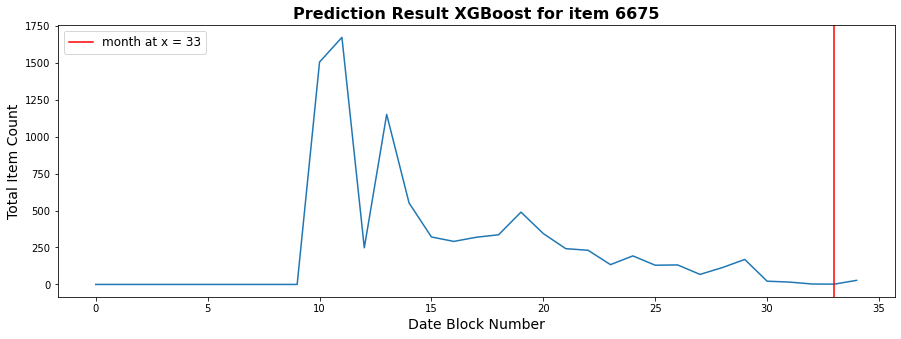

In [297]:
## Visualize result

sub_xg_df = sample_xgmodel_data.loc[sample_xgmodel_data['item_id']==6675]

algorithms = ["XGBoost"]

for algorithm in algorithms:
    for item_id, data in sub_xg_df.groupby(["item_id"]):
        
        model, kf_cv_scores, rms, forecast, combined_df, pred, metrics = xgboost_model(data, model=algorithm) 

combined_df2 = combined_df.groupby(['date_block_num'])[['item_cnt_day']].agg('sum').reset_index()

plot_predicted_data(combined_df2,
                   title="Prediction Result {} for item {}".format(algorithm, item_id))


## Forecast Training Models

In [217]:
# Data preprocessing for modelling
model_var = ['date', 'item_id', 'shop_id', 'item_cnt_day']
model_data = normData[model_var]
model_data = model_data.groupby(['date', 'item_id'])[['item_cnt_day']].sum().reset_index()
model_data

,date,item_id,item_cnt_day
0,2013-01-01,32,7.0
1,2013-01-01,33,2.0
2,2013-01-01,53,1.0
3,2013-01-01,59,2.0
4,2013-01-01,154,1.0
...,...,...,...
665800,2015-10-31,22102,6.0
665801,2015-10-31,22118,1.0
665802,2015-10-31,22139,1.0
665803,2015-10-31,22145,1.0


In [218]:
### General functions

def data_split(data, ratio=None):
    if ratio == None:
        ratio = ratio
    
    train_size = int(len(data) * ratio)
    test_size = int(len(data))-train_size
    train, test = data.iloc[: train_size], data.iloc[train_size:]
    
    return train,test,train_size,test_size

def pred_line_plot(orig_df, orig_y, pred_df, pred_y, forecast=True, conf=False, fc_conf=None, fc_date_min=None, fc_date_max=None, title=None):
    if forecast == True:
        dates = pd.date_range(start=pd.to_datetime(fc_date_min), 
                              end=pd.to_datetime(fc_date_max)+timedelta(days=30), freq='D')
        dates_df = pd.DataFrame(index=dates)
        orig_df = orig_df.append(dates_df)
    else:
        orig_df = orig_df
    
    fig, ax = plt.subplots(figsize=(15,5))

    plt.plot(pd.to_datetime(orig_df.index), orig_y, data=orig_df, color='skyblue', label='observed')
    plt.plot(pd.to_datetime(pred_df.index), pred_y, data=pred_df, color='olive', label='predicted')
    ax.fill_betweenx(ax.get_ylim(), pd.to_datetime(pred_df.index).min(), pd.to_datetime(pred_df.index).max(), alpha=.1, zorder=-1)
    
    if conf == True:
        ax.fill_between(fc_conf.index, fc_conf.iloc[:, 0], fc_conf.iloc[:, 1], color='k', alpha=.25)
    else:
        pass
    
    plt.title(title, fontsize=16, weight="bold")
    plt.ylabel("Item Count Data", fontsize=14)
    plt.xlabel("Date", fontsize=14)
    plt.legend(fontsize="12")
    plt.show()
    
    return plt

def pred_fb_plot(orig_df, orig_y, pred_df, pred_y, forecast=True, conf=False, fc_conf=None, fc_date_min=None, fc_date_max=None, title=None):
    if forecast == True:
        dates = pd.date_range(start=pd.to_datetime(fc_date_min), 
                              end=pd.to_datetime(fc_date_max)+timedelta(days=30), freq='D')
        dates_df = pd.DataFrame(index=dates)
        orig_df = orig_df.append(dates_df)
    else:
        orig_df = orig_df
    
    fig, ax = plt.subplots(figsize=(15,5))

    plt.plot(pd.to_datetime(orig_df.index), orig_y, data=orig_df, color='skyblue', label='observed')
    plt.plot(pd.to_datetime(pred_df.index), pred_y, data=pred_df, color='olive', label='predicted')
    ax.fill_betweenx(ax.get_ylim(), pd.to_datetime(pred_df.index).min(), pd.to_datetime(pred_df.index).max(), alpha=.1, zorder=-1)

    
    if conf == True:
        ax.fill_between(pred_df.index, pred_df.iloc[:, 1], pred_df.iloc[:, 2], color='k', alpha=.25)
    else:
        pass
    
    plt.title(title, fontsize=16, weight="bold")
    plt.ylabel("Item Count Data", fontsize=14)
    plt.xlabel("Date", fontsize=14)
    plt.legend(fontsize="12")
    plt.show()
    
    return plt

def stationarity_test(timeseries, critical_value=0.05):
    dftest = adfuller(timeseries.dropna(), autolag='AIC')
    t_stats = dftest[0]
    p_value = dftest[1]
    critical_value = critical_value
    
    return t_stats, p_value, critical_value

def differencing (data):
    
    t_stats, p_value, critical_value = stationarity_test(data["item_cnt_day"], critical_value=0.05)
    if p_value <= critical_value:
        data["item_cnt_day"] = data["item_cnt_day"]
    elif p_value > critical_value:
        print("  Applying differencing as the series is not stationary ...")
        data["item_cnt_day"] = (data["item_cnt_day"]  - data["item_cnt_day"] .rolling(window=12).mean())/data["item_cnt_day"] .rolling(window=12).std()
        data["item_cnt_day"] = data["item_cnt_day"] - data["item_cnt_day"].shift(12)
            
    return p_value, critical_value, data["item_cnt_day"]

In [219]:
### Forecast Modelling Function

def forecast_model(data, model=None):  
    data = data.set_index('date')
    if "item_id" in data.columns:
        data = data[['item_cnt_day']]
    
    ## Check if data not stationary, apply differencing
    p_value,critical_value, data["item_cnt_day"] = differencing(data)
    
    ## Train Test Split
    train, test, train_size, test_size = data_split(data, ratio=0.7)
    
    # Interpolate data if the data has null value
    if train["item_cnt_day"].isnull().sum() > 0:
        print("  Interp [item_cnt_day] ...")
        train["item_cnt_day"] = train["item_cnt_day"].interpolate(limit_direction="both")
    
    # Assign date for November for prediction
    dates = pd.date_range(start=pd.to_datetime(test.index.max()), 
                          end=pd.to_datetime(test.index.max())+timedelta(days=30), freq='D')
    
    # Assign empty list
    prediction_list = []
    forecast_conf_list = []
    history = [x for x in train]
    
    # Assign variable for Holt's Model        
    seasonal_type = 'additive'
    seasonal_period = 30
    
    # modelling
    if model == "SARIMAX":          
        model = SARIMAX(data,
                        order=(1,0,1),
                        seasonal_order=(1,1,1,30))
        model_fit = model.fit(disp=False)
        pref_fit = model_fit.get_prediction(start=test.index[0], dynamic=False)
        pred = pd.DataFrame(pref_fit.predicted_mean).rename(columns={'predicted_mean': 'item_cnt_day'})
        pred_ci = pref_fit.conf_int()

        forecast_fit = model_fit.get_forecast(steps=31)
        forecast = pd.DataFrame(forecast_fit.predicted_mean).rename(columns={'predicted_mean': 'item_cnt_day'})
        forecast = forecast.set_index(dates)
        forecast_conf = forecast_fit.conf_int()
        forecast_conf = forecast_conf.set_index(dates)
        
        history.append(test)
     
    elif model == "ARIMA":
        model = ARIMA(train, order=(1,1,1))
        model_fit = model.fit(disp=0)
        pred_num = model_fit.predict(start=len(train), end=len(train)+len(test)-1)
        pred = pd.DataFrame(pred_num).rename(columns={0: 'item_cnt_day'})
        pred = pred.set_index(pd.to_datetime(test.index))

        fc, se, conf = model_fit.forecast(31, alpha=0.05)
        fc_series = pd.Series(fc, index=dates)
        forecast = pd.DataFrame(fc_series).rename(columns={0:'item_cnt_day'})
        lower_series = pd.Series(conf[:, 0], index=dates)
        upper_series = pd.Series(conf[:, 1], index=dates)
        forecast_conf = pd.concat([lower_series, upper_series], axis=1).rename(columns={0:'lower item_cnt_day', 1:'upper item_cnt_day'})
        forecast_conf = forecast_conf.set_index(dates)
        
        history.append(test)
        
    elif model == "HWSE_ADD":
    
        model = ExponentialSmoothing(train, seasonal_periods = seasonal_period, trend='add', seasonal='add')
        model_fit = model.fit(use_boxcox=False)
        pred_num = model_fit.predict(start=len(train), end=len(train)+len(test)-1)
        pred = pd.DataFrame(pred_num).rename(columns={0: 'item_cnt_day'})
        pred = pred.set_index(pd.to_datetime(test.index))

        fc = model_fit.forecast(31).rename('item_cnt_day')
        fc_df = pd.DataFrame(fc)
        forecast = fc_df.set_index(dates)
        forecast_conf = []
        
    elif model == "HWSE_ADD_DAMP":
        
        model = ExponentialSmoothing(train, seasonal_periods = seasonal_period, trend='add', seasonal='add', damped=True)
        model_fit = model.fit(use_boxcox=False)
        pred_num = model_fit.predict(start=len(train), end=len(train)+len(test)-1)
        pred = pd.DataFrame(pred_num).rename(columns={0: 'item_cnt_day'})
        pred = pred.set_index(pd.to_datetime(test.index))

        fc = model_fit.forecast(31).rename('item_cnt_day')
        fc_df = pd.DataFrame(fc)
        forecast = fc_df.set_index(dates)
        forecast_conf = []

        
    elif model == "FbProphet":

        data = data.reset_index()
        indexedDataset = data
        data.columns = ['ds','y']
        
        train = train.reset_index()
        train.columns = ['ds','y']
            
        model = Prophet()
        model_fit = model.fit(train)
        future = model_fit.make_future_dataframe(periods= len(data)+31)  
        pred = model_fit.predict(future)
        pred = pred[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
        pred = pd.DataFrame(pred).rename(columns={'ds':'date','y':'item_cnt_day'})
        
        pred.sort_values(by=['date'], inplace= True, ascending= True)
        pred_ori = pred
        date_range_forecast = (pred['date'] > '2015-10-31') & (pred['date'] < '2015-12-01')
        forecast = pred.loc[date_range_forecast]
        
        # match len(pred) to len(test) for metrics evaluation
        test = test.reset_index()
        test['date'] = test['date'].astype(str)
        pred['date'] = pred['date'].astype(str)
        pred = test.merge(pred,how="left",on="date")
        pred= pred[['date','yhat']]
        pred = pred.rename(columns={'yhat':'item_cnt_day'})
        pred['date'] = pd.to_datetime(pred['date'])
        forecast_conf = []
        
        # restore index
        test = test.set_index('date')
        pred = pred.set_index('date')
        forecast = forecast.set_index('date')

               
    metrics = metrics_score(test, pred, model=model)
    metrics["p-value"] = "{:.4f}".format(p_value)
    if p_value <= critical_value:
        metrics["stationarity"] = 1
    elif p_value > critical_value:
        metrics["stationarity"] = 0 
        
    return history, train, test, pred, forecast, forecast_conf, metrics, model

In [220]:
## Select top popular item for sample analysis

sample_id = [32, 33, 500,600, 857, 2808, 3732, 6675, 12796, 16787, 3331, 17717, 4577, 22102, 20949]

sample_model_data = model_data.loc[model_data['item_id'].isin(sample_id)]
sample_model_data

,date,item_id,item_cnt_day
0,2013-01-01,32,7.0
1,2013-01-01,33,2.0
28,2013-01-01,2808,16.0
186,2013-01-01,17717,1.0
215,2013-01-02,32,14.0
...,...,...,...
664753,2015-10-31,3732,3.0
665273,2015-10-31,12796,1.0
665609,2015-10-31,17717,28.0
665753,2015-10-31,20949,159.0


In [221]:
## Run Model

metrics_forecast_df = pd.DataFrame()
pred_df = pd.DataFrame()
algorithms = ["SARIMAX","ARIMA", "HWSE_ADD","HWSE_ADD_DAMP", "FbProphet"]

for algorithm in algorithms:
    print(algorithm)
    for item_id, data in sample_model_data.groupby(["item_id"]):
        print("Initiate modelling for Item: {}".format(item_id))
        history, train, test, pred, forecast, forecast_conf, metrics, model = forecast_model(data, model=algorithm)

        # Creating result df
        metrics["model"] = algorithm
        metrics["item_id"] = item_id
        metrics_forecast_df = metrics_forecast_df.append(metrics, ignore_index=True)

SARIMAX
Initiate modelling for Item: 32
Initiate modelling for Item: 33
Initiate modelling for Item: 2808
Initiate modelling for Item: 3331
Initiate modelling for Item: 3732
Initiate modelling for Item: 6675
Initiate modelling for Item: 12796
Initiate modelling for Item: 16787
Initiate modelling for Item: 17717
  Applying differencing as the series is not stationary ...
  Interp [item_cnt_day] ...
Initiate modelling for Item: 20949
Initiate modelling for Item: 22102
ARIMA
Initiate modelling for Item: 32
Initiate modelling for Item: 33
Initiate modelling for Item: 2808
Initiate modelling for Item: 3331
Initiate modelling for Item: 3732
Initiate modelling for Item: 6675
Initiate modelling for Item: 12796
Initiate modelling for Item: 16787
Initiate modelling for Item: 17717
  Applying differencing as the series is not stationary ...
  Interp [item_cnt_day] ...
Initiate modelling for Item: 20949
Initiate modelling for Item: 22102
HWSE_ADD
Initiate modelling for Item: 32
Initiate modelling 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


FbProphet
Initiate modelling for Item: 32


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initiate modelling for Item: 33


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initiate modelling for Item: 2808


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initiate modelling for Item: 3331


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initiate modelling for Item: 3732


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initiate modelling for Item: 6675


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initiate modelling for Item: 12796


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initiate modelling for Item: 16787


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initiate modelling for Item: 17717
  Applying differencing as the series is not stationary ...
  Interp [item_cnt_day] ...


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initiate modelling for Item: 20949


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initiate modelling for Item: 22102


In [222]:
metrics_forecast_df

,MAE,MAPE,R2_Score,RMSE,item_id,model,p-value,stationarity
0,0.7356,49.5603,-0.2417,1.0186,32.0,SARIMAX,0.0000,1.0
1,0.4346,31.3569,-0.2107,0.6143,33.0,SARIMAX,0.0000,1.0
2,5.6859,249.8119,-0.3650,7.4485,2808.0,SARIMAX,0.0021,1.0
3,1.6799,87.3536,-0.1666,2.4872,3331.0,SARIMAX,0.0000,1.0
4,5.0098,240.5271,-10.4392,6.6040,3732.0,SARIMAX,0.0000,1.0
5,7.0714,251.1016,-6.7616,9.3899,6675.0,SARIMAX,0.0000,1.0
6,0.4210,32.4352,-0.1357,0.5641,12796.0,SARIMAX,0.0000,1.0
7,4.4264,163.5646,-0.8840,6.9274,16787.0,SARIMAX,0.0000,1.0
8,1.1068,183.3714,0.0545,1.3899,17717.0,SARIMAX,0.3564,0.0
9,46.0074,50.6971,-0.3745,65.3070,20949.0,SARIMAX,0.0022,1.0


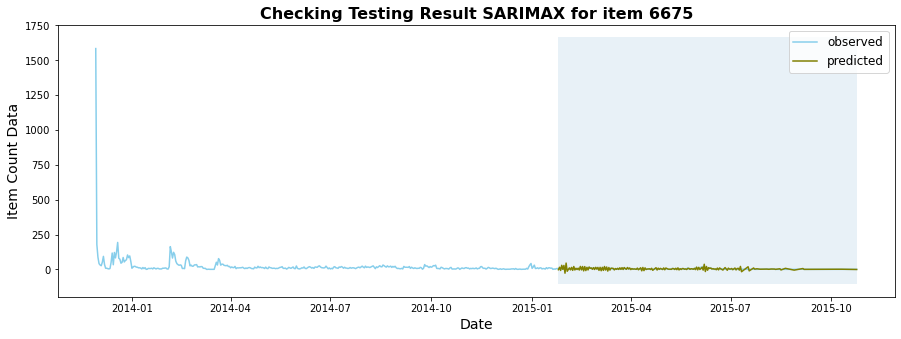

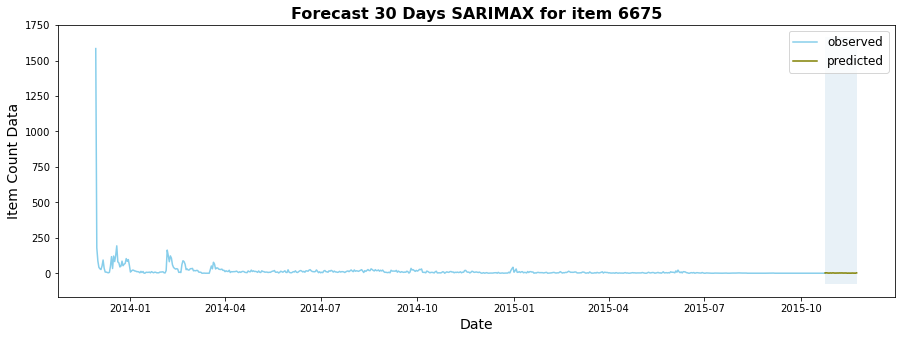

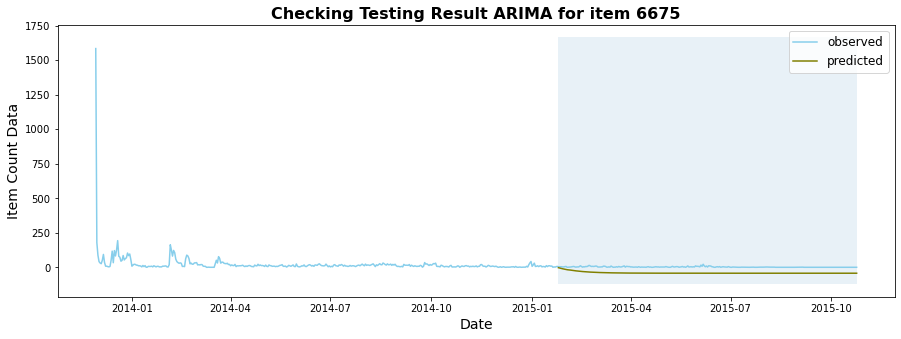

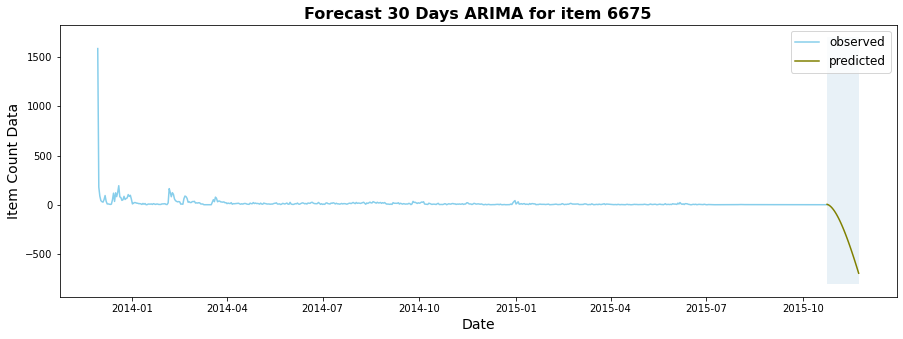

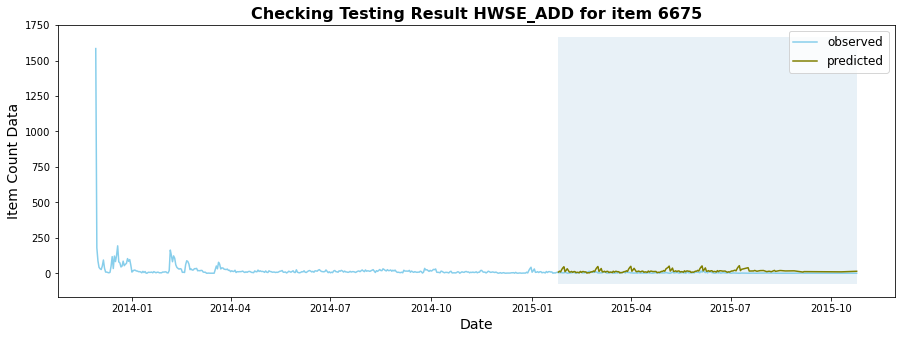

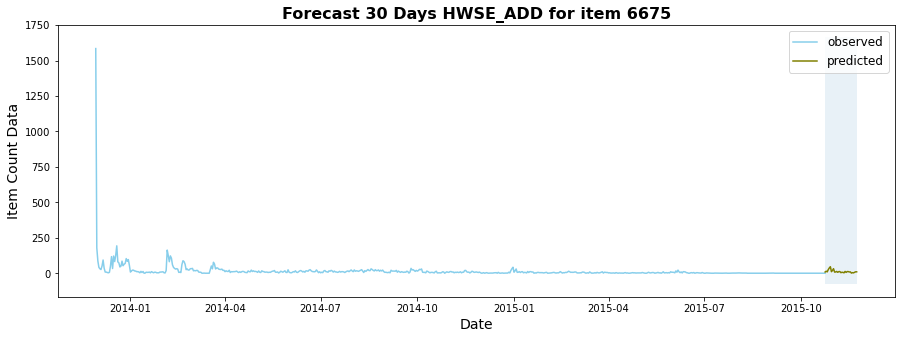

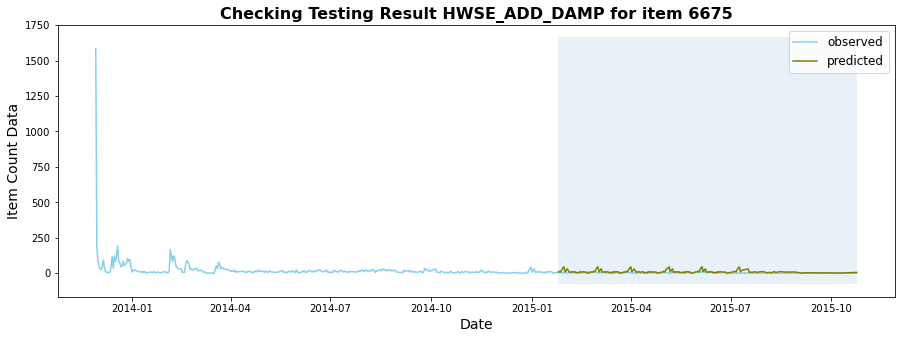

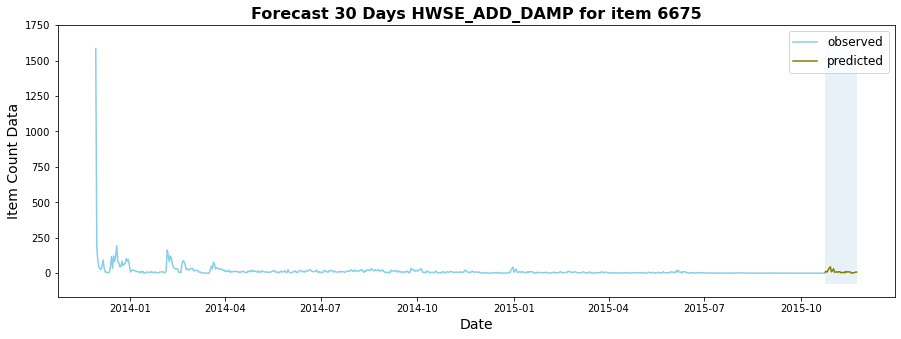

In [45]:
# Visualize SARIMA, ARIMA, Holts Models

sub_df = model_data.loc[model_data['item_id']==6675]
# sub_df2 = sub_df.drop(columns=['item_id'], axis=1)

algorithms = ["SARIMAX","ARIMA", "HWSE_ADD","HWSE_ADD_DAMP"]

#loop to visualize different models prediction and forecast

for algorithm in algorithms:
    for item_id, data in sub_df.groupby(["item_id"]):
        
        history, train, test, pred, forecast, forecast_conf, metrics, model = forecast_model(data, model= algorithm) 
        
        pred_line_plot(orig_df=data.set_index('date'), 
                       orig_y='item_cnt_day', 
                       pred_df=pred, 
                       pred_y='item_cnt_day',
                       forecast=False,
                       conf=False,
                       fc_date_min=None,
                       fc_date_max=None,
                       title="Checking Testing Result {} for item {}".format(algorithm, item_id))

        pred_line_plot(orig_df=data.set_index('date'),
                       orig_y='item_cnt_day',
                       pred_df=forecast, 
                       pred_y='item_cnt_day',
                       forecast=True,
                       conf=False,
                       fc_conf=forecast_conf,
                       fc_date_min=test.index.min(),
                       fc_date_max=test.index.max(),
                       title="Forecast 30 Days {} for item {}".format(algorithm, item_id))


From the visualization plots of ARIMA, SARIMA, & Holts models for item id 6675, we could observed that SARIMA models and Holts models are predicting well compared to ARIMA model.

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


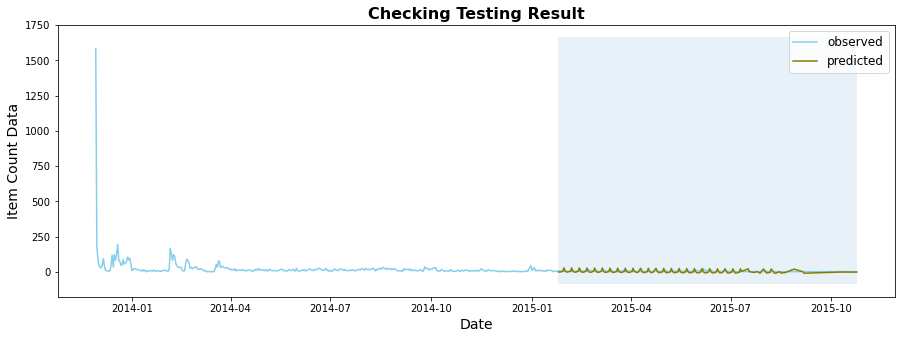

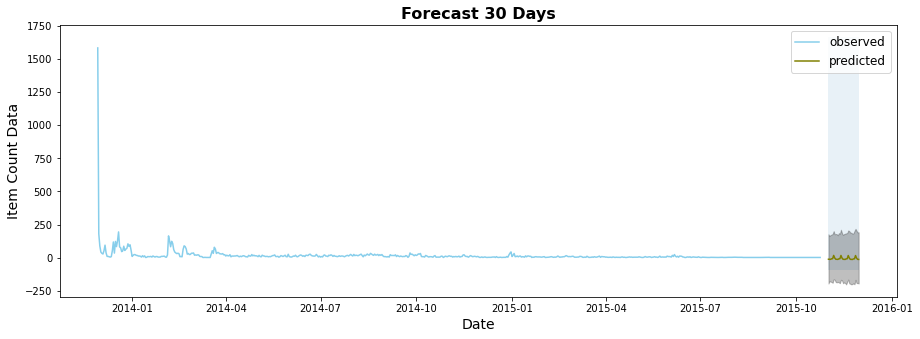

<module 'matplotlib.pyplot' from 'C:\\Users\\MLee27\\AppData\\Local\\Continuum\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [40]:
# Visualize FbProphet

sub_df = model_data.loc[model_data['item_id']==6675]
sub_df = sub_df.drop(columns=['item_id'], axis=1)

history, train, test, pred, forecast, forecast_conf, metrics, model= forecast_model(sub_df, model="FbProphet") 

pred_fb_plot(orig_df=sub_df.set_index('date'),
                     orig_y='item_cnt_day',
                     pred_df=pred, 
                     pred_y='item_cnt_day',
                     forecast=False,
                     conf=False,
                     fc_conf=None,
                     fc_date_min=None,
                     fc_date_max=None,
                     title="Checking Testing Result")


pred_fb_plot(orig_df=sub_df.set_index('date'),
                     orig_y='item_cnt_day',
                     pred_df=forecast, 
                     pred_y='yhat',
                     forecast=True,
                     conf=True,
                     fc_conf=None,
                     fc_date_min=test.index.min(),
                     fc_date_max=test.index.max(),
                     title="Forecast 30 Days")

## Evaluation & Analysis

This section is showing the metrics comparison between different training models, to evaluate which model give better prediction. <br>

This evaluation is based on MAE, MAPE, R2 Score, RMSE. <br>

Evaluation score description: <br>
1. MAE (Mean Absolute Error) is insensitive to outliers.
2. MAPE (Mean Absolute Percentage Error) is similar to MAE, but was normalized.
3. R2 Score - to measure the proportion of variance for dependent variable explained by an independent variables.
4. RMSE (Root Mean Square Error) is to interpret model accuracy.

In [368]:
#combine all dataframe
new_matrics = metrics_reg_df.append(metrics_xg_df[['MAE','MAPE','R2_Score','RMSE','model']], ignore_index = True)
all_metrics_df = new_matrics.append(metrics_forecast_df[['MAE','MAPE','R2_Score','RMSE','model']], ignore_index = True)

#change the data type
all_metrics_df["MAE"] = all_metrics_df['MAE'].astype('float')
all_metrics_df["MAPE"] = all_metrics_df['MAPE'].astype('float')
all_metrics_df["R2_Score"] = all_metrics_df['R2_Score'].astype('float')
all_metrics_df["RMSE"] = all_metrics_df['RMSE'].astype('float')

#remove outlier using IQR Score for better visualization
#print(all_metrics_df.shape) #(110, 5)
Q1 = all_metrics_df.quantile(0.25)
Q3 = all_metrics_df.quantile(0.75)
IQR = Q3 - Q1

metrics_outlier = all_metrics_df[~((all_metrics_df < (Q1 - 1.5 * IQR)) |(all_metrics_df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(metrics_outlier.shape)

(81, 5)


In [369]:
def box_plot(model, evaluation, data, title = None):
#     plt.figure(figsize=(15.7,8.27))

    fig, ax = plt.subplots(figsize=(15,5))
    
    sns.boxplot(x = model, y = evaluation, data = data, palette="Set1")
    plt.xlabel('MODEL', fontsize = 14)
    plt.ylabel(evaluation, fontsize = 14)
    plt.xticks(fontsize = 12, rotation= 45)
    plt.yticks(fontsize = 12)
    plt.title(title, fontsize=16, weight="bold")
    

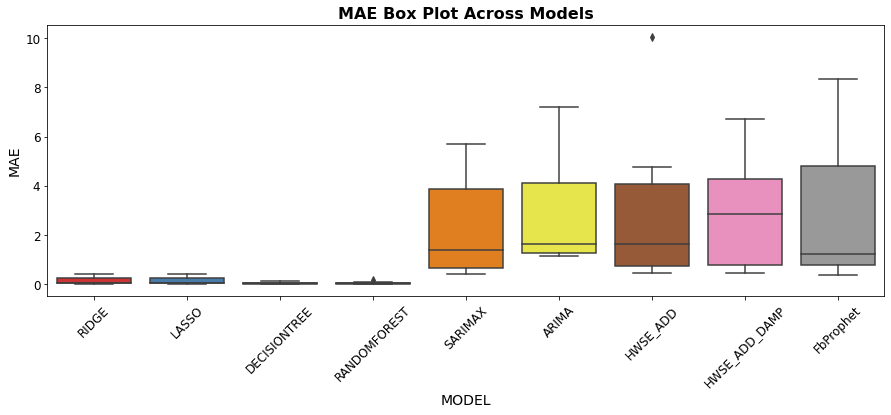

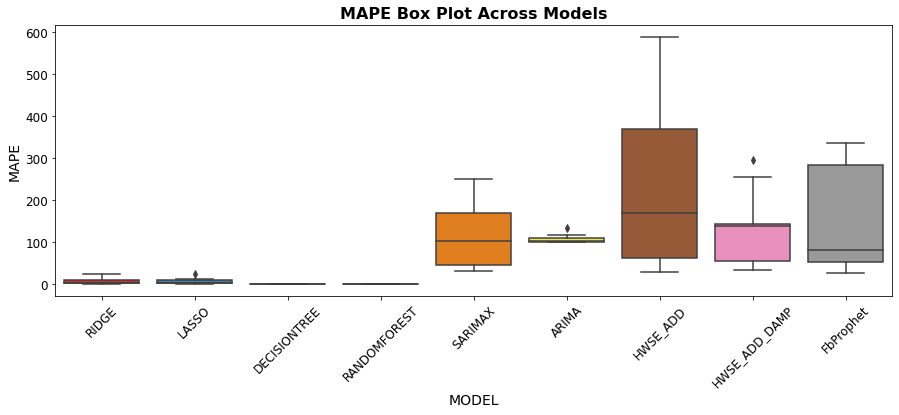

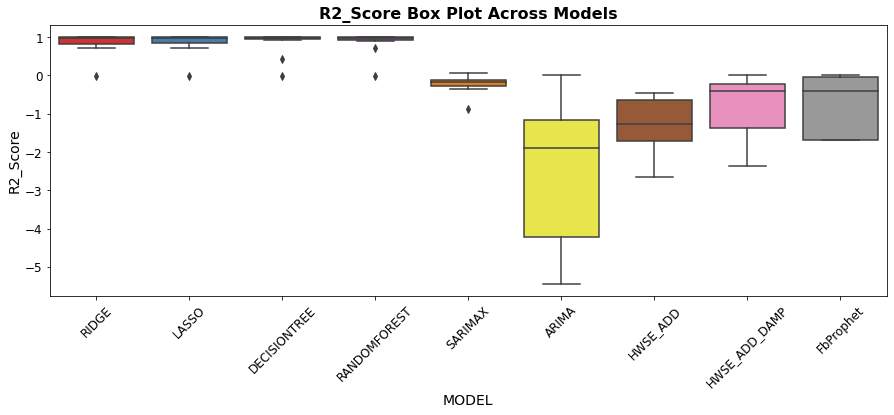

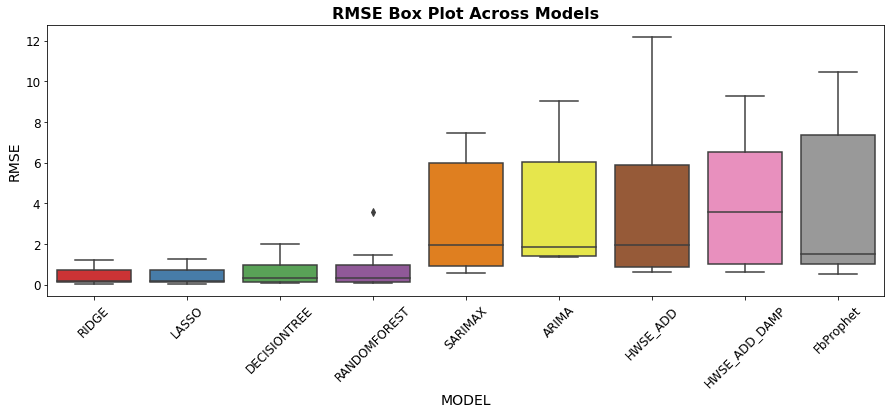

In [370]:
# Visualize Evaluation Score 

evaluation_score = ["MAE" , "MAPE", "R2_Score", "RMSE"]

for evaluation in evaluation_score:
    box_plot(model = 'model',
             evaluation = evaluation, 
             data = metrics_outlier, 
             title = "{} Box Plot Across Models".format(evaluation))


From the analysis, the xgboost was not included in the visualize as it contains alot of outlier, that we exclude the model into box plot visualization. <br>

From model comparison, supervised learning model is giving lower MAE, MAPE, & RMSE , with an ideal R2 score compared to the forecast model. <br>

The supervised learning models, overall give a consistent result. However, we could observed difference when comparing the forecast models. <br>

From forecast model, we could conclude that model that considering seasonality giving a better range of MAE, MAPE, RMSE score. For Holt's seasonal model, adding damping effect give better prediction. <br>

10 models have been trained using this data for Novemeber sales prediction. Model performamce ranking (top to bottom approach) is listed as below: <br>
1. Ridge & LASSO
2. Decision Tree & Random Forest
3. SARIMAX
4. HWSE_ADD_DAMP
5. FbProphet
6. ARIMA
7. HWSE_ADD
8. XgBoost


## Future Work

In this study, we have not extend the regression model to forecast the sales at month 34, but we manage to train the model and get a good result from the prediction. <br>

In future, we would like to extend the study by forecasting the month 34 sales using the trained regression models.